# Script 17: Plot 2 x 2 - Linhas de Corrente em 250, 500, 700 e 850 hPa

Init: 2021-07-16 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-16 00:00:00 UTC


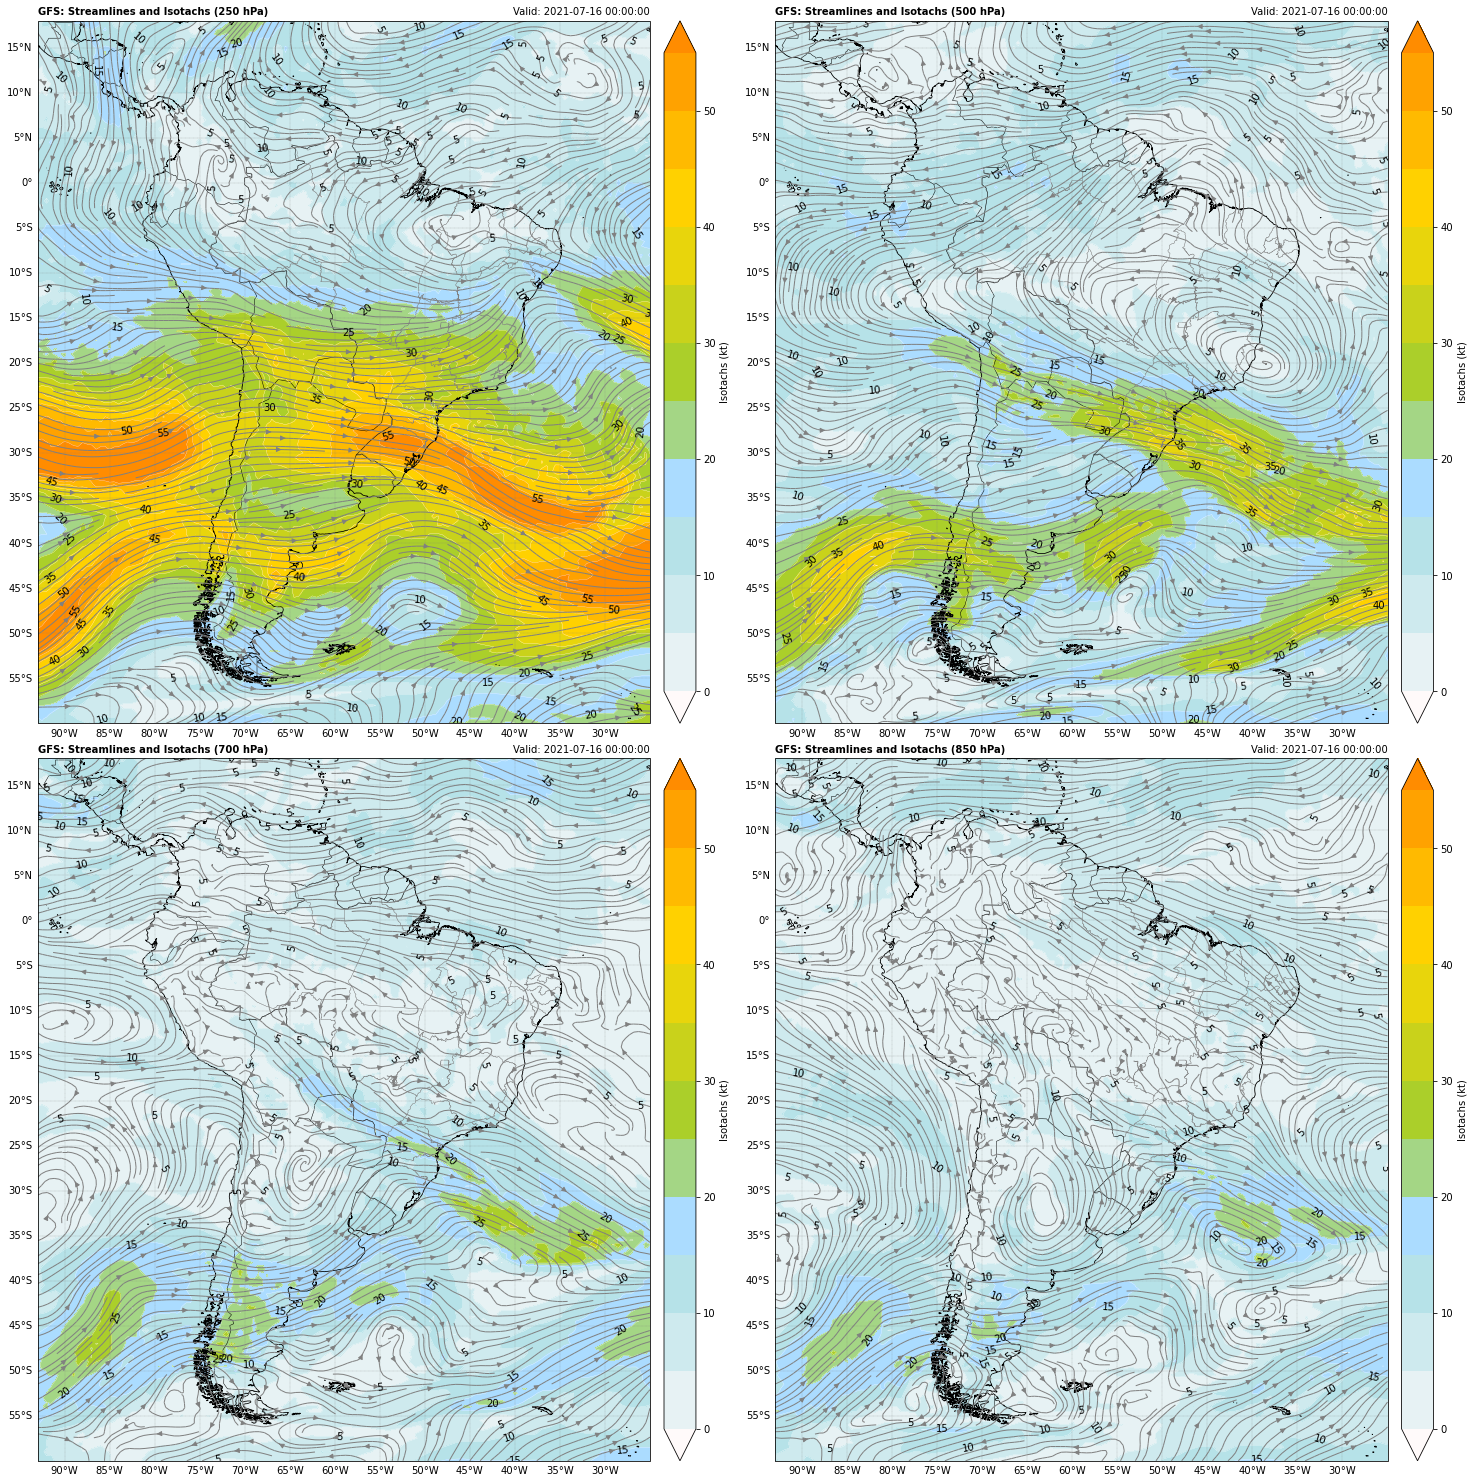

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 17: 2 x 2 Plot - Streamlines (250, 500, 700 and 850 hPa)  
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
#-----------------------------------------------------------------------------------------------------------   

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_250 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Get information from the file    
init  = str(ucomp_250.analDate)      # Init date / time
run   = str(ucomp_250.hour).zfill(2) # Run
ftime = str(ucomp_250.forecastTime)  # Forecast hour
valid = str(ucomp_250.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp_250, lats, lons = ucomp_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_250 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp_250 = vcomp_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_500 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
ucomp_500 = ucomp_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_500 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
vcomp_500 = vcomp_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_700 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
ucomp_700 = ucomp_700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_700 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
vcomp_700 = vcomp_700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_850 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
ucomp_850 = ucomp_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_850 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
vcomp_850 = vcomp_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws_250 = np.sqrt(ucomp_250**2 + vcomp_250**2)
ws_500 = np.sqrt(ucomp_500**2 + vcomp_500**2)
ws_700 = np.sqrt(ucomp_700**2 + vcomp_700**2)
ws_850 = np.sqrt(ucomp_850**2 + vcomp_850**2)

#-----------------------------------------------------------------------------------------------------------

# Define de contour interval
data_min = 0
data_max = 60 
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e", 
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(2,2, figsize=(20,20), sharex = False, sharey = False, gridspec_kw ={'left':0, 'bottom':0, 'right':1, 'top':1, 'hspace':0.05, 'wspace':0.05}, subplot_kw=dict(projection=ccrs.PlateCarree())) # 2 row x 2 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0,0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[0,0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0,0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0,0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0,0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img1 = axs[0,0].contourf(lons, lats, ws_250, cmap=cmap, levels=levels, extend='both')    
img2 = axs[0,0].contour(lons, lats, ws_250, colors='white', linewidths=0.3, levels=levels)
axs[0,0].clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img3 = Axes.streamplot(axs[0,0], lons, lats, ucomp_250, vcomp_250, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img1, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[0,0])

# Add a title
axs[0,0].set_title('GFS: Streamlines and Isotachs (250 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[0,0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0,1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[0,1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0,1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0,1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0,1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img4 = axs[0,1].contourf(lons, lats, ws_500, cmap=cmap, levels=levels, extend='both')    
img5 = axs[0,1].contour(lons, lats, ws_500, colors='white', linewidths=0.3, levels=levels)
axs[0,1].clabel(img5, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img6 = Axes.streamplot(axs[0,1], lons, lats, ucomp_500, vcomp_500, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img4, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[0,1])

# Add a title
axs[0,1].set_title('GFS: Streamlines and Isotachs (500 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[0,1].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1,0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[1,0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1,0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1,0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1,0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img7 = axs[1,0].contourf(lons, lats, ws_700, cmap=cmap, levels=levels, extend='both')    
img8 = axs[1,0].contour(lons, lats, ws_700, colors='white', linewidths=0.3, levels=levels)
axs[1,0].clabel(img8, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img9 = Axes.streamplot(axs[1,0], lons, lats, ucomp_700, vcomp_700, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img7, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[1,0])

# Add a title
axs[1,0].set_title('GFS: Streamlines and Isotachs (700 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[1,0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#----------------------------------------------------------------------------------------------------------- 

# Define the image extent
axs[1,1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[1,1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1,1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1,1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1,1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img10 = axs[1,1].contourf(lons, lats, ws_850, cmap=cmap, levels=levels, extend='both')    
img11 = axs[1,1].contour(lons, lats, ws_850, colors='white', linewidths=0.3, levels=levels)
axs[1,1].clabel(img11, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img12 = Axes.streamplot(axs[1,1], lons, lats, ucomp_850, vcomp_850, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img10, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[1,1])

# Add a title
axs[1,1].set_title('GFS: Streamlines and Isotachs (850 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[1,1].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Save the image
plt.savefig('Figure/image_17.png')

# Show the image
plt.show()  